In [104]:
import pandas as pd
df = pd.read_csv("bi.csv",encoding='latin1')

# Data Cleaning Task

This task consists of cleaning steps performed on the dataset, addressing inconsistencies, missing values, and outliers.

## Inconsistencies Found and Fixed

Several inconsistencies were identified and resolved in the categorical columns to ensure data uniformity:

*   **Gender:** Variations in casing and format (e.g., 'Female', 'M', 'Male', 'F') were standardized to 'F' and 'M'.
*   **Country:** Inconsistent capitalization and alternative names (e.g., 'Rsa', 'South Africa', 'Norge') were standardized with proper capitalization and consistent naming.
*   **Previous Education:** Typos and inconsistent entries (e.g., 'Barrrchelors', 'Diplomaaa', 'HighSchool') were corrected to standard educational level names (e.g., 'Bachelors', 'Diploma', 'High School').

## Missing Value Imputation

Missing values were found in the **'Python'** column. These missing values were imputed with the **mean** of the existing values in that column. The mean was chosen as the imputation strategy because, after the removal of outliers, the distribution of the 'Python' column was considered less skewed, making the mean a suitable representative value.

## Outlier Detection and Treatment

Outliers in the numerical columns ('Age', 'entryEXAM', 'studyHOURS', 'Python', and 'DB') were detected using the **Interquartile Range (IQR) method**. This method identifies values falling outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

Once detected, the rows containing these outliers were **removed** from the dataset. This approach was taken to prevent extreme values from disproportionately influencing subsequent statistical analyses and model training.

# Part 1 Data Cleaning

In [105]:
df.shape

(77, 11)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [107]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [108]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [109]:
df['gender'] = df['gender'].apply(str.lower)
df['gender'] = df['gender'].replace(['female','male'],['f','m']).apply(str.upper)


In [110]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [111]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [112]:
df['country'] = df['country'].apply(str.lower).apply(lambda x:x.capitalize())

In [113]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'Uk', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [114]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [115]:
df['prevEducation'] = df['prevEducation'].apply(str.lower).replace(['barrrchelors','diplomaaa','highschool'],['bachelors','diploma','high school']).apply(lambda x:x.capitalize())

In [116]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High school', 'Bachelors', 'Doctorate'],
      dtype=object)

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
for col in df.columns:
  print(f"Column '{col}': {df[col].duplicated().sum()} duplicates")

Column 'fNAME': 6 duplicates
Column 'lNAME': 11 duplicates
Column 'Age': 45 duplicates
Column 'gender': 75 duplicates
Column 'country': 62 duplicates
Column 'residence': 71 duplicates
Column 'entryEXAM': 41 duplicates
Column 'prevEducation': 72 duplicates
Column 'studyHOURS': 59 duplicates
Column 'Python': 45 duplicates
Column 'DB': 37 duplicates


In [119]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Part 2 Missing Data

In [120]:
df.isnull().sum()

,0
fNAME,0
lNAME,0
Age,0
gender,0
country,0
residence,0
entryEXAM,0
prevEducation,0
studyHOURS,0
Python,2


In [121]:
df['Python'].fillna(df['Python'].mean(),inplace=True)

/tmp/ipython-input-1694133381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Python'].fillna(df['Python'].mean(),inplace=True)


In [122]:
df['Python'].unique()


array([59.        , 60.        , 74.        , 75.85333333, 91.        ,
       88.        , 80.        , 85.        , 83.        , 79.        ,
       70.        , 75.        , 87.        , 76.        , 84.        ,
       33.        , 30.        , 61.        , 82.        , 66.        ,
       81.        , 31.        , 90.        , 69.        , 57.        ,
       86.        , 78.        , 48.        , 45.        , 15.        ,
       63.        , 72.        ])

It is better to use median, since we haven't removed the outliers

In [123]:
df['Python'].fillna(df['Python'].median(),inplace=True)

/tmp/ipython-input-816809393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Python'].fillna(df['Python'].median(),inplace=True)


# Part 3 Outliers

<Axes: >

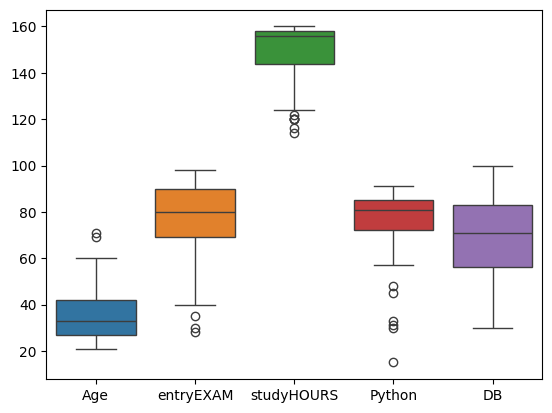

In [124]:
import seaborn as sns
sns.boxplot(df)

Negatively Skewed Normal plot

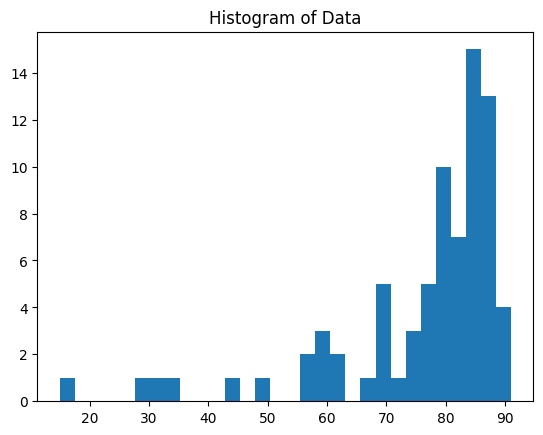

In [125]:

plt.hist(df['Python'], bins=30)
plt.title("Histogram of Data")
plt.show()

In [126]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outliers for column '{col}':")
    display(outliers[col])
    print("-" * 30)

    df.drop(outliers.index, inplace=True)

Outliers for column 'Age':


,Age
32,71
55,69


------------------------------
Outliers for column 'entryEXAM':


,entryEXAM
53,28
76,35


------------------------------
Outliers for column 'studyHOURS':


,studyHOURS
3,120
4,122
20,116
21,114
49,120


------------------------------
Outliers for column 'Python':


,Python
0,59.0
1,60.0
22,61.0
39,60.0
40,57.0
47,57.0
48,48.0


------------------------------
Outliers for column 'DB':


,DB


------------------------------


In [127]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,34.967213,82.180328,154.196721,81.292678,71.508197
std,8.183250,10.627807,7.077711,6.191746,16.465745
min,21.000000,50.000000,130.000000,63.000000,33.000000
25%,29.000000,77.000000,152.000000,80.000000,59.000000
50%,34.000000,82.000000,156.000000,83.000000,74.000000
75%,42.000000,90.000000,158.000000,85.000000,86.000000
max,50.000000,98.000000,160.000000,90.000000,100.000000


In [128]:
df.shape

(61, 11)

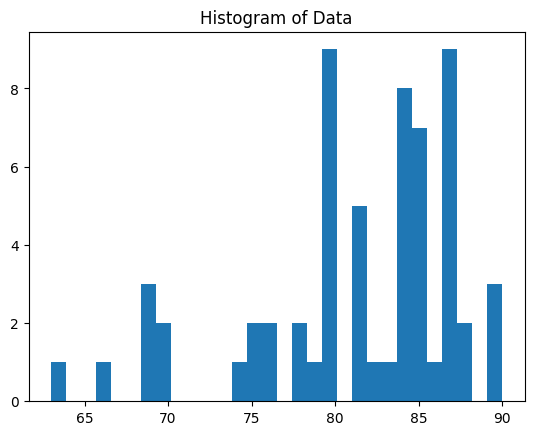

In [129]:
plt.hist(df['Python'], bins=30)
plt.title("Histogram of Data")
plt.show()

In [130]:
df.to_csv('cleaned_students.csv',index=False)